In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datasets
import matplotlib.transforms as mtransforms
import evaluate
import pandas as pd
from scipy.stats import wasserstein_distance as wass
import pickle as pkl
from evaluate import load



/home/haskari/miniconda3/envs/acl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2023-12-11 11:40:08,135] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [ ]:
#paraphrased llama

p_data_llama_cnn = datasets.load_from_disk("llama2/saved_models/LlaMa2-cnn-capped_random-rouge/")
print(p_data_llama_cnn)
p_data_llama_xsum = datasets.load_from_disk("llama2/saved_models/LlaMa2-xsum-capped_random-rouge/")
print(p_data_llama_xsum)
p_data_llama_news = datasets.load_from_disk("llama2/saved_models/LlaMa2-news-capped_random-rouge/")
print(p_data_llama_news)
p_data_llama_reddit = datasets.load_from_disk("llama2/saved_models/LlaMa2-reddit-capped_random-rouge/")
print(p_data_llama_reddit)

In [5]:
def get_bad_indice(name,model):
    if name=='cnn':
        with open('{}/data_paraphrase/cnn.pkl'.format(model), 'rb') as f:
            paraphrased_summaries=pkl.load(f)
    elif name=='xsum':
        with open('{}/data_paraphrase/xsum_capped_random.pkl'.format(model), 'rb') as f:
            paraphrased_summaries=pkl.load(f)
        
    elif name=='news':
        with open('{}/data_paraphrase/news_capped_random.pkl'.format(model), 'rb') as f:
            paraphrased_summaries=pkl.load(f)
    
    else:
        with open('{}/data_paraphrase/reddit_capped_random.pkl'.format(model), 'rb') as f:
            paraphrased_summaries=pkl.load(f)
        
    bad_index=[]
    for idx,sum in enumerate(paraphrased_summaries):
        if sum == []:
            bad_index.append(idx)
    return bad_index

In [ ]:
#original llama

data_llama_cnn = datasets.load_from_disk("../position_bias/llama/saved_models/LlaMa2-cnn/")

bad_index=get_bad_indice('cnn','llama2')
data_llama_cnn=data_llama_cnn.select(i for i in range(len(data_llama_cnn)) 
                 if i not in set(bad_index))
print(data_llama_cnn)


data_llama_xsum = datasets.load_from_disk("../position_bias/llama/saved_models/LlaMa2-xsum-capped_random/")

bad_index=get_bad_indice('xsum','llama2')
data_llama_xsum=data_llama_xsum.select(i for i in range(len(data_llama_xsum)) 
                 if i not in set(bad_index))
print(data_llama_xsum)

data_llama_news = datasets.load_from_disk("../position_bias/llama/saved_models/LlaMa2-news-capped_random/")

bad_index=get_bad_indice('news','llama2')
data_llama_news=data_llama_news.select(i for i in range(len(data_llama_news)) 
                 if i not in set(bad_index))
print(data_llama_news)

data_llama_reddit = datasets.load_from_disk("../position_bias/llama/saved_models/LlaMa2-reddit-capped_random/")

bad_index=get_bad_indice('reddit','llama2')
data_llama_reddit=data_llama_reddit.select(i for i in range(len(data_llama_reddit)) 
                 if i not in set(bad_index))
print(data_llama_reddit)



In [8]:
def get_lines(data):
    cumm_list1 = [0]*10
    cumm_list2 = [0]*10

    for ind, da in enumerate(data):
        y1 = da['mapping_gen']
    #     print(y)
        cumm_list1 = [a+b for a,b in zip(cumm_list1, y1)]
        y2 = da['mapping']
    #     print(y)
        cumm_list2 = [a+b for a,b in zip(cumm_list2, y2)]
    
    return cumm_list1,cumm_list2

In [9]:
def get_lines_modified(data):
    cumm_list1 = [0]*10
    #cumm_list2 = [0]*10

    for ind, da in enumerate(data):
        y1 = da['mapping_gen']
    #     print(y)
        cumm_list1 = [a+b for a,b in zip(cumm_list1, y1)]
    #     y2 = da['mapping']
    # #     print(y)
    #     cumm_list2 = [a+b for a,b in zip(cumm_list2, y2)]
    
    return cumm_list1

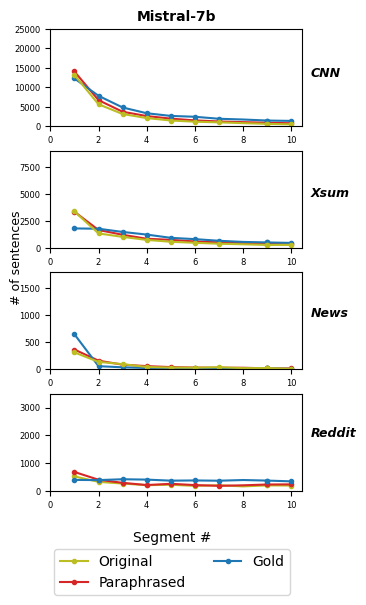

In [10]:
markers=[0,1,2,3,4,5,6,8,8,9]
x = [j for j in range(1,11)]
even_xticks = np.arange(0, 11, 2)

cnn_ticks=[0,5000,10000,15000,20000,25000]
xsum_ticks=[0,2500,5000,7500]
news_ticks=[0,500,1000,1500]
reddit_ticks=[0,1000,2000,3000]


fig, axs = plt.subplots(4, 1, figsize=(3.25, 6)) #,sharey=True)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')

cumm_list1,cumm_list2=get_lines(p_data_llama_cnn)
cumm_list1_peg=get_lines_modified(data_llama_cnn)
axs[0].plot(x, cumm_list1,color='tab:red', marker='.', label="Paraphrased", markevery=markers)
axs[0].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[0].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Original", markevery=markers)
axs[0].set_title('Mistral-7b',fontsize = 10,weight='bold')
axs[0].set_xticks(even_xticks)
axs[0].set_xticklabels(even_xticks, fontsize=6)
axs[0].set_yticks(cnn_ticks)
axs[0].set_yticklabels(cnn_ticks, fontsize=6)
axs[0].set_ylim([0, 25000])
# axs[0, 0].annotate("Test", xy=(-0.55, 0.55), xycoords=axs[0, 0].transAxes, fontsize=10)





cumm_list1,cumm_list2=get_lines(p_data_llama_xsum)
cumm_list1_peg=get_lines_modified(data_llama_xsum)
axs[1].plot(x, cumm_list1,color='tab:red', marker='.', label="Paraphrased", markevery=markers)
axs[1].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[1].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Original", markevery=markers)
#axs[1, 0].set_title('XSUM-BART',fontsize = 10)
axs[1].set_xticks(even_xticks)
axs[1].set_xticklabels(even_xticks, fontsize=6)
axs[1].set_yticks(xsum_ticks)
axs[1].set_yticklabels(xsum_ticks, fontsize=6)
axs[1].set_ylim([0, 9000])


cumm_list1,cumm_list2=get_lines(p_data_llama_news)
cumm_list1_peg=get_lines_modified(data_llama_news)
axs[2].plot(x, cumm_list1,color='tab:red', marker='.', label="Paraphrased", markevery=markers)
axs[2].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[2].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Original", markevery=markers)
#axs[2, 0].set_title('NEWS-BART',fontsize = 10)
axs[2].set_xticks(even_xticks)
axs[2].set_xticklabels(even_xticks, fontsize=6)
axs[2].set_yticks(news_ticks)
axs[2].set_yticklabels(news_ticks, fontsize=6)
axs[2].set_ylim([0, 1800])


cumm_list1,cumm_list2=get_lines(p_data_llama_reddit)
cumm_list1_peg=get_lines_modified(data_llama_reddit)
axs[3].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Original", markevery=markers)
axs[3].plot(x, cumm_list1,color='tab:red', marker='.', label="Paraphrased", markevery=markers)
axs[3].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)

#axs[3, 0].set_title('REDDIT-BART',fontsize = 10)
axs[3].set_xticks(even_xticks)
axs[3].set_xticklabels(even_xticks, fontsize=6)
axs[3].set_xticklabels(even_xticks, fontsize=6)
axs[3].set_yticks(reddit_ticks)
axs[3].set_yticklabels(reddit_ticks, fontsize=6)
axs[3].set_ylim([0, 3500])
handles, labels = axs[3].get_legend_handles_labels()





fig.text(0.5, 0.025, 'Segment #', ha='center')
fig.text(0.001, 0.5, '# of sentences', va='center', rotation='vertical',fontsize=9)
    
# for ax in axs.flat:
#     ax.label_outer()

plt.gcf().text(0.925, 0.8, "CNN", fontsize=9,style='italic',weight='bold')
plt.gcf().text(0.925, 0.6, "Xsum", fontsize=9,style='italic',weight='bold')
plt.gcf().text(0.925, 0.4, "News", fontsize=9,style='italic',weight='bold')
plt.gcf().text(0.925, 0.2, "Reddit", fontsize=9,style='italic',weight='bold')


fig.legend(handles, labels,ncol=2, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure)
#fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)
fig.subplots_adjust(hspace=0.25, wspace=0.15)

plt.savefig('figures/Mistral-7b_only.png',bbox_inches='tight',dpi=400)
plt.show()

In [11]:
def get_rouge1(data):

    highlights = []
    model_s = []


    for j in data['highlights']:
        highlights.append(' '.join(j))

    for k in data['model_summaries']:
        model_s.append(' '.join(k))


    rouge = evaluate.load('rouge')

    print("==> Comparing generated summaries with gold summaries")
    results = rouge.compute(predictions=model_s, references=highlights)
    
    return results['rouge1']

==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries


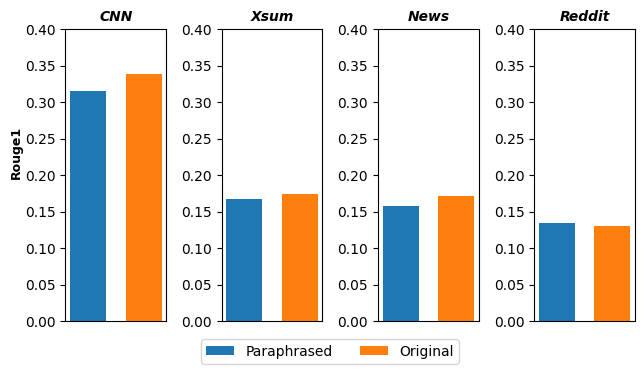

In [12]:
#Bar Plot Code
fig, axs = plt.subplots(1, 4) #,sharey=True)
fig.set_figheight(3.5)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')


x=['Paraphrased', 'Original']
values=[]

values.append(get_rouge1(p_data_llama_cnn))
values.append(get_rouge1(data_llama_cnn))
axs[0].bar(x,values,color=['tab:blue', 'tab:orange'],label=x,width=0.65)
axs[0].set_ylim(0,0.4)
axs[0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[0].get_xaxis().set_ticks([])


values=[]

values.append(get_rouge1(p_data_llama_xsum))
values.append(get_rouge1(data_llama_xsum))
axs[1].bar(x,values,color=['tab:blue', 'tab:orange'],label=x,width=0.65)
axs[1].set_ylim(0,0.4)
axs[1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[1].get_xaxis().set_ticks([])


values=[]
values.append(get_rouge1(p_data_llama_news))
values.append(get_rouge1(data_llama_news))
axs[2].bar(x,values,color=['tab:blue', 'tab:orange'],label=x,width=0.65)
axs[2].set_ylim(0,0.4)
axs[2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[2].get_xaxis().set_ticks([])

values=[]
values.append(get_rouge1(p_data_llama_reddit))
values.append(get_rouge1(data_llama_reddit))
axs[3].bar(x,values,color=['tab:blue', 'tab:orange'],label=x,width=0.65)
axs[3].set_ylim(0,0.4)
axs[3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[3].get_xaxis().set_ticks([])

handles, labels = axs[3].get_legend_handles_labels()

fig.text(0, 0.55, 'Rouge1', va='center', rotation='vertical', weight='bold',fontsize=9)

fig.legend(handles, labels,ncol=2, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)

plt.savefig('figures/Mistral-7b_rouge1_bar.png',bbox_inches='tight',dpi=400)
plt.show()

In [13]:
def get_rouge2(data):

    highlights = []
    model_s = []


    for j in data['highlights']:
        highlights.append(' '.join(j))

    for k in data['model_summaries']:
        model_s.append(' '.join(k))


    rouge = evaluate.load('rouge')

    print("==> Comparing generated summaries with gold summaries")
    results = rouge.compute(predictions=model_s, references=highlights)
    
    return results['rouge2']

==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries


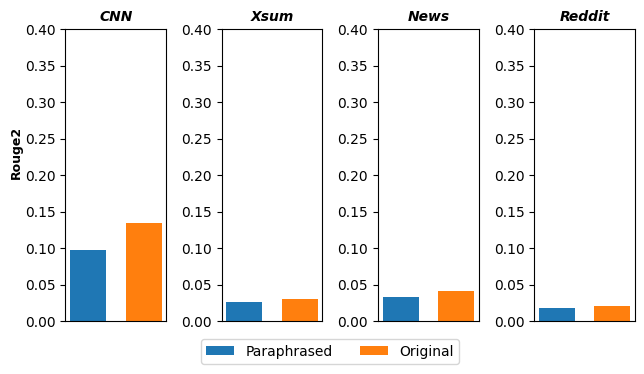

In [14]:
#Bar Plot Code
fig, axs = plt.subplots(1, 4) #,sharey=True)
fig.set_figheight(3.5)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')


x=['Paraphrased', 'Original']
values=[]

values.append(get_rouge2(p_data_llama_cnn))
values.append(get_rouge2(data_llama_cnn))
axs[0].bar(x,values,color=['tab:blue', 'tab:orange'],label=x,width=0.65)
axs[0].set_ylim(0,0.4)
axs[0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[0].get_xaxis().set_ticks([])


values=[]

values.append(get_rouge2(p_data_llama_xsum))
values.append(get_rouge2(data_llama_xsum))
axs[1].bar(x,values,color=['tab:blue', 'tab:orange'],label=x,width=0.65)
axs[1].set_ylim(0,0.4)
axs[1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[1].get_xaxis().set_ticks([])


values=[]
values.append(get_rouge2(p_data_llama_news))
values.append(get_rouge2(data_llama_news))
axs[2].bar(x,values,color=['tab:blue', 'tab:orange'],label=x,width=0.65)
axs[2].set_ylim(0,0.4)
axs[2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[2].get_xaxis().set_ticks([])

values=[]
values.append(get_rouge2(p_data_llama_reddit))
values.append(get_rouge2(data_llama_reddit))
axs[3].bar(x,values,color=['tab:blue', 'tab:orange'],label=x,width=0.65)
axs[3].set_ylim(0,0.4)
axs[3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[3].get_xaxis().set_ticks([])

handles, labels = axs[3].get_legend_handles_labels()

fig.text(0, 0.55, 'Rouge2', va='center', rotation='vertical', weight='bold',fontsize=9)

fig.legend(handles, labels,ncol=2, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)

plt.savefig('figures/Mistral-7b_rouge2_bar.png',bbox_inches='tight',dpi=400)
plt.show()

In [15]:
def get_rougeL(data):

    highlights = []
    model_s = []


    for j in data['highlights']:
        highlights.append(' '.join(j))

    for k in data['model_summaries']:
        model_s.append(' '.join(k))


    rouge = evaluate.load('rouge')

    print("==> Comparing generated summaries with gold summaries")
    results = rouge.compute(predictions=model_s, references=highlights)
    
    return results['rougeL']

==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries


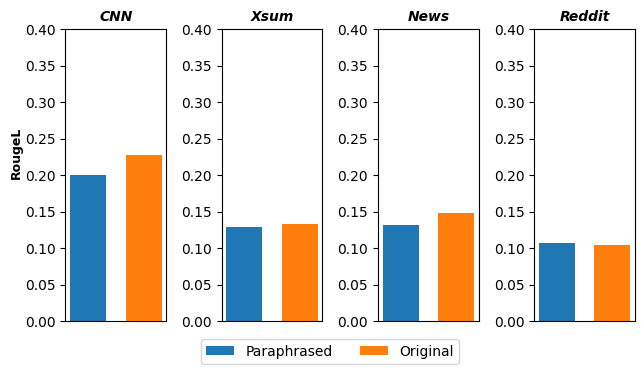

In [16]:
#Bar Plot Code
fig, axs = plt.subplots(1, 4) #,sharey=True)
fig.set_figheight(3.5)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')


x=['Paraphrased', 'Original']
values=[]

values.append(get_rougeL(p_data_llama_cnn))
values.append(get_rougeL(data_llama_cnn))
axs[0].bar(x,values,color=['tab:blue', 'tab:orange'],label=x,width=0.65)
axs[0].set_ylim(0,0.4)
axs[0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[0].get_xaxis().set_ticks([])


values=[]

values.append(get_rougeL(p_data_llama_xsum))
values.append(get_rougeL(data_llama_xsum))
axs[1].bar(x,values,color=['tab:blue', 'tab:orange'],label=x,width=0.65)
axs[1].set_ylim(0,0.4)
axs[1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[1].get_xaxis().set_ticks([])


values=[]
values.append(get_rougeL(p_data_llama_news))
values.append(get_rougeL(data_llama_news))
axs[2].bar(x,values,color=['tab:blue', 'tab:orange'],label=x,width=0.65)
axs[2].set_ylim(0,0.4)
axs[2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[2].get_xaxis().set_ticks([])

values=[]
values.append(get_rougeL(p_data_llama_reddit))
values.append(get_rougeL(data_llama_reddit))
axs[3].bar(x,values,color=['tab:blue', 'tab:orange'],label=x,width=0.65)
axs[3].set_ylim(0,0.4)
axs[3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[3].get_xaxis().set_ticks([])

handles, labels = axs[3].get_legend_handles_labels()

fig.text(0, 0.55, 'RougeL', va='center', rotation='vertical', weight='bold',fontsize=9)

fig.legend(handles, labels,ncol=2, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)

plt.savefig('figures/Mistral-7b_rougeL_bar.png',bbox_inches='tight',dpi=400)
plt.show()

In [17]:
def get_wass(data):

    cumm_list1 = [0]*10
    cumm_list2 = [0]*10

    for ind, da in enumerate(data):
        y1 = da['mapping_gen']
    #     print(y)
        cumm_list1 = [a+b for a,b in zip(cumm_list1, y1)]
        y2 = da['mapping']
    #     print(y)
        cumm_list2 = [a+b for a,b in zip(cumm_list2, y2)]
   
    wasse=wass(np.array(cumm_list1)/np.sum(cumm_list1), np.array(cumm_list2)/np.sum(cumm_list2))
    return wasse

In [18]:
print(get_wass(p_data_llama_cnn))
print(get_wass(p_data_llama_xsum))
print(get_wass(p_data_llama_news))
print(get_wass(p_data_llama_reddit))

print(get_wass(data_llama_cnn))
print(get_wass(data_llama_xsum))
print(get_wass(data_llama_news))
print(get_wass(data_llama_reddit))

0.019913064078853057
0.031411969461818616
0.06377340637791658
0.03139334171659745
0.027498095848681032
0.04180692598421977
0.06780482642551608
0.026693135571481057


In [19]:
def get_bertscore(data):
    
    highlights = []
    model_s = []


    for j in data['highlights']:
        highlights.append(' '.join(j))

    for k in data['model_summaries']:
        model_s.append(' '.join(k))
    
    bertscore = load("bertscore")
    
    results = bertscore.compute(predictions=model_s, references=highlights, lang="en", device='cuda:1')
    mean_precision=sum(results['precision'])/len(results['precision'])
    mean_recall=sum(results['recall'])/len(results['recall'])
    mean_f1=sum(results['f1'])/len(results['f1'])
    
    return mean_precision,mean_recall,mean_f1

In [20]:
print(get_bertscore(p_data_llama_cnn))
print(get_bertscore(p_data_llama_xsum))
print(get_bertscore(p_data_llama_news))
print(get_bertscore(p_data_llama_reddit))

print(get_bertscore(data_llama_cnn))
print(get_bertscore(data_llama_xsum))
print(get_bertscore(data_llama_news))
print(get_bertscore(data_llama_reddit))

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(0.8575497179598462, 0.8574141005416558, 0.8573190575679334)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(0.8522544553093793, 0.8517732215465407, 0.85183170846714)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(0.8484877217735085, 0.8671911402004902, 0.8575487984257324)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(0.8485544370379219, 0.8400441483874028, 0.8440792604070002)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(0.866571770242925, 0.8577177657411909, 0.8618149741921785)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(0.851615294861011, 0.851658716067511, 0.8514386986201401)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(0.8446245528226078, 0.8620123111784226, 0.8530237772121504)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(0.8313897757153762, 0.8225671551281348, 0.8267305302664749)


In [ ]:
#paraphrased gpt

p_data_llama_cnn = datasets.load_from_disk("gpt3.5-T/saved_models/GPT-cnn/")
print(p_data_llama_cnn)
p_data_llama_xsum = datasets.load_from_disk("gpt3.5-T/saved_models/GPT-xsum/")
print(p_data_llama_xsum)
p_data_llama_news = datasets.load_from_disk("gpt3.5-T/saved_models/GPT-news/")
print(p_data_llama_news)
p_data_llama_reddit = datasets.load_from_disk("gpt3.5-T/saved_models/GPT-reddit/")
print(p_data_llama_reddit)

In [ ]:
#original GPT

data_llama_cnn = datasets.load_from_disk("../position_bias/chatGPT/saved_models/GPT-3.5-Turbo-cnn/")

bad_index=get_bad_indice('cnn','gpt3.5-T')
data_llama_cnn=data_llama_cnn.select(i for i in range(len(data_llama_cnn)) 
                 if i not in set(bad_index))
print(data_llama_cnn)


data_llama_xsum = datasets.load_from_disk("../position_bias/chatGPT/saved_models/GPT-3.5-Turbo-xsum-capped_random/")

bad_index=get_bad_indice('xsum','gpt3.5-T')
data_llama_xsum=data_llama_xsum.select(i for i in range(len(data_llama_xsum)) 
                 if i not in set(bad_index))
print(data_llama_xsum)

data_llama_news = datasets.load_from_disk("../position_bias/chatGPT/saved_models/GPT-3.5-Turbo-news-capped_random/")

bad_index=get_bad_indice('news','gpt3.5-T')
data_llama_news=data_llama_news.select(i for i in range(len(data_llama_news)) 
                 if i not in set(bad_index))
print(data_llama_news)

data_llama_reddit = datasets.load_from_disk("../position_bias/chatGPT/saved_models/GPT-3.5-Turbo-reddit/")

bad_index=get_bad_indice('reddit','gpt3.5-T')
data_llama_reddit=data_llama_reddit.select(i for i in range(len(data_llama_reddit)) 
                 if i not in set(bad_index))
print(data_llama_reddit)



In [ ]:
#paraphrased dolly-v2

p_data_llama_cnn = datasets.load_from_disk("dolly-v2/saved_models/dolly-cnn/")
print(p_data_llama_cnn)
p_data_llama_xsum = datasets.load_from_disk("dolly-v2/saved_models/dolly-xsum/")
print(p_data_llama_xsum)
p_data_llama_news = datasets.load_from_disk("dolly-v2/saved_models/dolly-news/")
print(p_data_llama_news)
p_data_llama_reddit = datasets.load_from_disk("dolly-v2/saved_models/dolly-reddit/")
print(p_data_llama_reddit)

In [ ]:
#original dolly

data_llama_cnn = datasets.load_from_disk("../position_bias/dolly2/saved_models/Dollyv2-cnn/")

bad_index=get_bad_indice('cnn','dolly-v2')
data_llama_cnn=data_llama_cnn.select(i for i in range(len(data_llama_cnn)) 
                 if i not in set(bad_index))
print(data_llama_cnn)


data_llama_xsum = datasets.load_from_disk("../position_bias/dolly2/saved_models/Dollyv2-xsum_capped_random/")

bad_index=get_bad_indice('xsum','dolly-v2')
data_llama_xsum=data_llama_xsum.select(i for i in range(len(data_llama_xsum)) 
                 if i not in set(bad_index))
print(data_llama_xsum)

data_llama_news = datasets.load_from_disk("../position_bias/dolly2/saved_models/Dollyv2-news_capped_random/")

bad_index=get_bad_indice('news','dolly-v2')
data_llama_news=data_llama_news.select(i for i in range(len(data_llama_news)) 
                 if i not in set(bad_index))
print(data_llama_news)

data_llama_reddit = datasets.load_from_disk("../position_bias/dolly2/saved_models/Dollyv2-reddit_capped_random/")

bad_index=get_bad_indice('reddit','dolly-v2')
data_llama_reddit=data_llama_reddit.select(i for i in range(len(data_llama_reddit)) 
                 if i not in set(bad_index))
print(data_llama_reddit)

In [2]:
#paraphrased mistral-7b

p_data_llama_cnn = datasets.load_from_disk("mistral-7b/saved_models/paraphrase/Mistral-cnn/")
print(p_data_llama_cnn)
p_data_llama_xsum = datasets.load_from_disk("mistral-7b/saved_models/paraphrase/Mistral-xsum/")
print(p_data_llama_xsum)
p_data_llama_news = datasets.load_from_disk("mistral-7b/saved_models/paraphrase/Mistral-news/")
print(p_data_llama_news)
p_data_llama_reddit = datasets.load_from_disk("mistral-7b/saved_models/paraphrase/Mistral-reddit/")
print(p_data_llama_reddit)

Dataset({
    features: ['article', 'highlights', 'id', 'original_article', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
    num_rows: 11301
})
Dataset({
    features: ['document', 'summary', 'id', 'original_article', 'article', 'highlights', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
    num_rows: 10109
})
Dataset({
    features: ['text', 'prediction', 'prediction_agent', 'annotation', 'annotation_agent', 'id', 'metadata', 'status', 'event_timestamp', 'metrics', 'original_article', 'article', 'highlights', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
    num_rows: 856
})
Dataset({
    features: ['ups', 'num_comments', 'upvote_ratio', 'score', 'documents', 'tldr', 'title', 'original_article', 'article', 'highlights', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
  

In [7]:
#original mistral-7b

data_llama_cnn = datasets.load_from_disk("mistral-7b/saved_models/original/Mistral-cnn/")

bad_index=get_bad_indice('cnn','mistral-7b')
data_llama_cnn=data_llama_cnn.select(i for i in range(len(data_llama_cnn)) 
                 if i not in set(bad_index))
print(data_llama_cnn)


data_llama_xsum = datasets.load_from_disk("mistral-7b/saved_models/original/Mistral-xsum/")

bad_index=get_bad_indice('xsum','mistral-7b')
data_llama_xsum=data_llama_xsum.select(i for i in range(len(data_llama_xsum)) 
                 if i not in set(bad_index))
print(data_llama_xsum)

data_llama_news = datasets.load_from_disk("mistral-7b/saved_models/original/Mistral-news/")

bad_index=get_bad_indice('news','mistral-7b')
data_llama_news=data_llama_news.select(i for i in range(len(data_llama_news)) 
                 if i not in set(bad_index))
print(data_llama_news)

data_llama_reddit = datasets.load_from_disk("mistral-7b/saved_models/original/Mistral-reddit/")

bad_index=get_bad_indice('reddit','mistral-7b')
data_llama_reddit=data_llama_reddit.select(i for i in range(len(data_llama_reddit)) 
                 if i not in set(bad_index))
print(data_llama_reddit)

Dataset({
    features: ['article', 'highlights', 'id', 'original_article', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
    num_rows: 11024
})
Dataset({
    features: ['document', 'summary', 'id', 'original_article', 'article', 'highlights', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
    num_rows: 8896
})
Dataset({
    features: ['text', 'prediction', 'prediction_agent', 'annotation', 'annotation_agent', 'id', 'metadata', 'status', 'event_timestamp', 'metrics', 'original_article', 'article', 'highlights', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
    num_rows: 771
})
Dataset({
    features: ['ups', 'num_comments', 'upvote_ratio', 'score', 'documents', 'tldr', 'title', 'original_article', 'article', 'highlights', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
   

In [ ]:
#paper table

In [4]:
#paraphrased llama

p_data_llama_cnn = datasets.load_from_disk("../llama2/saved_models/LlaMa2-cnn-capped_random-rouge/")
print(p_data_llama_cnn)
p_data_llama_xsum = datasets.load_from_disk("../llama2/saved_models/LlaMa2-xsum-capped_random-rouge/")
print(p_data_llama_xsum)
p_data_llama_news = datasets.load_from_disk("../llama2/saved_models/LlaMa2-news-capped_random-rouge/")
print(p_data_llama_news)
p_data_llama_reddit = datasets.load_from_disk("../llama2/saved_models/LlaMa2-reddit-capped_random-rouge/")
print(p_data_llama_reddit)

Dataset({
    features: ['article', 'highlights', 'id', 'original_article', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
    num_rows: 10951
})
Dataset({
    features: ['document', 'summary', 'id', 'original_article', 'article', 'highlights', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
    num_rows: 11249
})
Dataset({
    features: ['text', 'prediction', 'prediction_agent', 'annotation', 'annotation_agent', 'id', 'metadata', 'status', 'event_timestamp', 'metrics', 'original_article', 'article', 'highlights', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
    num_rows: 993
})
Dataset({
    features: ['ups', 'num_comments', 'upvote_ratio', 'score', 'documents', 'tldr', 'title', 'original_article', 'article', 'highlights', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
  

In [5]:
def get_bad_indice(name,model):
    if name=='cnn':
        with open('../{}/data_paraphrase/cnn.pkl'.format(model), 'rb') as f:
            paraphrased_summaries=pkl.load(f)
    elif name=='xsum':
        with open('../{}/data_paraphrase/xsum_capped_random.pkl'.format(model), 'rb') as f:
            paraphrased_summaries=pkl.load(f)
        
    elif name=='news':
        with open('../{}/data_paraphrase/news_capped_random.pkl'.format(model), 'rb') as f:
            paraphrased_summaries=pkl.load(f)
    
    else:
        with open('../{}/data_paraphrase/reddit_capped_random.pkl'.format(model), 'rb') as f:
            paraphrased_summaries=pkl.load(f)
        
    bad_index=[]
    for idx,sum in enumerate(paraphrased_summaries):
        if sum == []:
            bad_index.append(idx)
    return bad_index

In [ ]:
#original llama

data_llama_cnn = datasets.load_from_disk("../../position_bias/llama/saved_models/LlaMa2-cnn/")

bad_index=get_bad_indice('cnn','llama2')
data_llama_cnn=data_llama_cnn.select(i for i in range(len(data_llama_cnn)) 
                 if i not in set(bad_index))
print(data_llama_cnn)


data_llama_xsum = datasets.load_from_disk("../../position_bias/llama/saved_models/LlaMa2-xsum-capped_random/")

bad_index=get_bad_indice('xsum','llama2')
data_llama_xsum=data_llama_xsum.select(i for i in range(len(data_llama_xsum)) 
                 if i not in set(bad_index))
print(data_llama_xsum)

data_llama_news = datasets.load_from_disk("../../position_bias/llama/saved_models/LlaMa2-news-capped_random/")

bad_index=get_bad_indice('news','llama2')
data_llama_news=data_llama_news.select(i for i in range(len(data_llama_news)) 
                 if i not in set(bad_index))
print(data_llama_news)

data_llama_reddit = datasets.load_from_disk("../../position_bias/llama/saved_models/LlaMa2-reddit-capped_random/")

bad_index=get_bad_indice('reddit','llama2')
data_llama_reddit=data_llama_reddit.select(i for i in range(len(data_llama_reddit)) 
                 if i not in set(bad_index))
print(data_llama_reddit)

